In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
diamonds=pd.read_csv("diamonds.csv")

In [6]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Seeing which columns have string values

In [9]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Doing One-Hot Encoding to get all string values in integer form

In [10]:
diamonds_enc=pd.get_dummies(diamonds,columns=['cut','color','clarity'])
diamonds_enc

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
49996,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
49997,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49998,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
diamonds_enc.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056,0.029900,0.091140,0.398760,...,0.101160,0.052120,0.013760,0.032640,0.242300,0.17038,0.151580,0.228080,0.067380,0.093880
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065,0.170313,0.287811,0.489648,...,0.301543,0.222271,0.116494,0.177694,0.428479,0.37597,0.358617,0.419599,0.250681,0.291665
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### Extracting the features to use in the feature matrix

In [12]:
features=diamonds_enc.columns.values
features=np.setdiff1d(features,np.array(['price']))
features

array(['carat', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'depth', 'table', 'x', 'y', 'z'], dtype=object)

### Converting the feature matrix to numpy array

In [13]:
X=np.array(diamonds_enc[features])
X

array([[0.23, 0.  , 0.  , ..., 3.95, 3.98, 2.43],
       [0.21, 0.  , 0.  , ..., 3.89, 3.84, 2.31],
       [0.23, 0.  , 0.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.7 , 0.  , 0.  , ..., 5.66, 5.68, 3.56],
       [0.86, 0.  , 0.  , ..., 6.15, 6.12, 3.74],
       [0.75, 0.  , 0.  , ..., 5.83, 5.87, 3.64]])

## Converting the target 'price' to numpy array

In [14]:
Y=np.array(diamonds_enc['price'])
Y.reshape(-1,1)
Y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [15]:
print(X.shape,Y.shape)

(50000, 26) (50000,)


### Checking the peak-to-peak value of features to see if normalization is required

In [16]:
np.ptp(X,axis=0)

array([ 4.81,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  , 36.  , 52.  , 10.74, 58.9 , 31.8 ])

## Doing the test-train-validation split

In [19]:
diamonds_X=diamonds_enc.drop('price',axis=1)
diamonds_Y=diamonds_enc['price']

In [32]:
diamonds_train,diamonds_test_valid,diamonds_Y_train,diamonds_Y_test_valid=train_test_split(diamonds_X,diamonds_Y,test_size=0.4,random_state=10)

In [49]:
diamonds_valid,diamonds_test,diamonds_Y_valid,diamonds_Y_test=train_test_split(diamonds_test_valid,diamonds_Y_test_valid,test_size=0.5,random_state=10)

### Applying Normalization

In [54]:
X_train_norm=preprocessing.normalize(np.array(diamonds_train))
Y_train=np.array(diamonds_Y_train).reshape(-1,1)
X_valid_norm=preprocessing.normalize(np.array(diamonds_valid))
Y_valid=np.array(diamonds_Y_valid).reshape(-1,1)
X_test_norm=preprocessing.normalize(np.array(diamonds_test))
Y_test=np.array(diamonds_Y_test).reshape(-1,1)

In [241]:
print(X_train_norm)
print(X_valid_norm)
print(X_test_norm)

[[0.02277733 0.70825034 0.69125233 ... 0.01133201 0.         0.        ]
 [0.01083813 0.71341067 0.69078161 ... 0.01191003 0.         0.        ]
 [0.00933808 0.71669759 0.68868335 ... 0.         0.         0.        ]
 ...
 [0.0039847  0.73951378 0.66802354 ... 0.         0.         0.        ]
 [0.00589478 0.74510013 0.6602153  ... 0.01178956 0.         0.        ]
 [0.01748645 0.68795365 0.71326298 ... 0.         0.         0.        ]]
[[0.00858771 0.71172147 0.69407549 ... 0.         0.         0.        ]
 [0.004683   0.7176693  0.69074207 ... 0.         0.         0.        ]
 [0.01147867 0.70160418 0.70277547 ... 0.01171292 0.         0.        ]
 ...
 [0.0083425  0.72579724 0.67931761 ... 0.         0.         0.        ]
 [0.00667378 0.72696498 0.67929514 ... 0.         0.         0.01191746]
 [0.02435077 0.69607573 0.7008271  ... 0.         0.         0.        ]]
[[0.00858791 0.72520117 0.6798761  ... 0.         0.         0.        ]
 [0.01436072 0.72515714 0.67649684 ... 

## Fitting the data in linear regression model

In [287]:
linearRegressor=LinearRegression()

In [86]:
def best_feature(X,Y,X_valid,Y_valid,model,nfeatures):
  valid_error=[]
  for i in range(nfeatures):
    model.fit(X[:,i].reshape(-1,1),Y)
    valid_error.append(mean_squared_error(Y_valid,model.predict(X_valid[:,i].reshape(-1,1))))
  return np.argmin(valid_error)



In [87]:
best_feature_index=best_feature(X_train_norm,Y_train,X_valid_norm,Y_valid,linearRegressor,len(X_train_norm[0,:]))

In [253]:
best_feature_str=diamonds_enc.columns[best_feature_index]
best_feature_str

'carat'

In [167]:
simple_model=LinearRegression().fit(X_train_norm[:,best_feature_index].reshape(-1,1),Y_train)
simple_model_testerror=mean_squared_error(Y_test,simple_model.predict(X_test_norm[:,best_feature_index].reshape(-1,1)))

In [168]:
simple_model_testerror

2285729.696359871

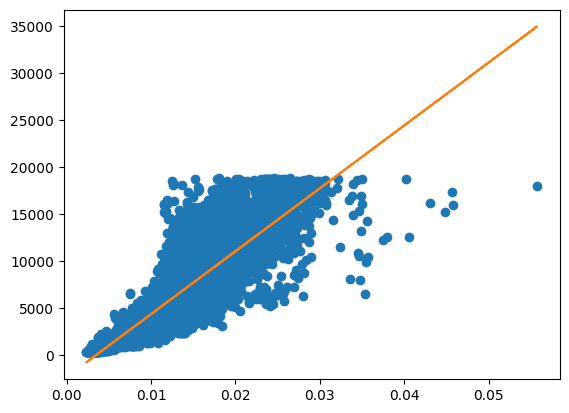

In [291]:
plt.plot(X_train_norm[:,best_feature_index],Y_train,'o',
        X_train_norm[:,best_feature_index],simple_model.predict(X_train_norm[:,best_feature_index].reshape(-1,1)),'-')

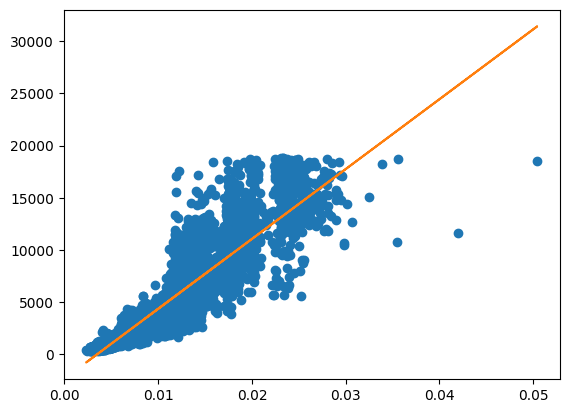

In [292]:
plt.plot(X_test_norm[:,best_feature_index],Y_test,'o',
        X_test_norm[:,best_feature_index],simple_model.predict(X_test_norm[:,best_feature_index].reshape(-1,1)),'-')

## Multiple Linear Regression using all features

In [171]:
multiple_model=LinearRegression().fit(X_train_norm,Y_train)

In [306]:
multiple_model_testerror=mean_squared_error(Y_test,multiple_model.predict(X_test_norm))

In [307]:
multiple_model_testerror

1214215.4639960476

##Ridge Regression (L2 penalty)

In [242]:
alpha=[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]

In [231]:
def best_alpha_value(X,Y,X_valid,Y_valid,alphas):
  valid_error=[]
  for alpha in alphas:
    model=Ridge(alpha=alpha)
    model.fit(X,Y)
    valid_error.append(mean_squared_error(Y_valid,model.predict(X_valid)))
  print(valid_error)
  return alphas[np.argmin(valid_error)]

In [236]:
best_alpha=best_alpha_value(X_train_norm,Y_train,X_valid_norm,Y_valid,alpha)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.33399e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[1221026.130686234, 1221026.131573956, 1221026.2194568827, 1225182.6094811154, 1280583.3426972479, 3102074.220230037, 4218843.292257928, 5579107.106805622, 7728319.615373188, 9174402.623718672, 9720422.703150608, 10182088.160010803, 10576914.481607398, 10918088.900750564, 11215648.418710193, 12801279.980265008]


In [237]:
best_alpha

1e-15

In [308]:
ridge_model=Ridge(alpha=best_alpha)
ridge_model.fit(X_train_norm,Y_train)
ridge_testerror=mean_squared_error(Y_test,ridge_model.predict(X_test_norm))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.33399e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [309]:
ridge_testerror

1214215.4639960388

## Lasso Regression (L1 penalty)

In [243]:
alpha=[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]

In [244]:
def best_alpha_value_lasso(X,Y,X_valid,Y_valid,alphas):
  valid_error=[]
  for alpha in alphas:
    model=Lasso(alpha=alpha)
    model.fit(X,Y)
    valid_error.append(mean_squared_error(Y_valid,model.predict(X_valid)))
  print(valid_error)
  return alphas[np.argmin(valid_error)]

In [245]:
best_alpha_lasso=best_alpha_value(X_train_norm,Y_train,X_valid_norm,Y_valid,alpha)

[1221026.130686234, 1221026.131573956, 1221026.2194568827, 1225182.6094811154, 1280583.3426972479, 3102074.220230037, 4218843.292257928, 5579107.106805622, 7728319.615373188, 9174402.623718672, 9720422.703150608, 10182088.160010803, 10576914.481607398, 10918088.900750564, 11215648.418710193, 12801279.980265008]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.33399e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [246]:
best_alpha_lasso

1e-15

In [310]:
lasso_model=Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_norm,Y_train)
lasso_testerror=mean_squared_error(Y_test,lasso_model.predict(X_test_norm))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.939e+10, tolerance: 4.829e+07
  model = cd_fast.enet_coordinate_descent(


In [311]:
lasso_testerror

1212918.7843539512

##K-NN Model

In [218]:
neighbour_model=KNeighborsRegressor(n_neighbors=10)

In [219]:
neighbour_model.fit(X_train_norm,Y_train)

KNeighborsRegressor(n_neighbors=10)

In [222]:
neighbour_model_testerror=mean_squared_error(Y_test,neighbour_model.predict(X_test_norm))

In [223]:
neighbour_model_testerror

992552.911133

##Weighted K-NN (Kernel Regression)

In [224]:
kernel_model=KNeighborsRegressor(n_neighbors=10,weights='distance')

In [225]:
kernel_model.fit(X_train_norm,Y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [227]:
kernel_model_testerror=mean_squared_error(Y_test,kernel_model.predict(X_test_norm))

In [228]:
kernel_model_testerror

815297.4552609912

##Neural Networks

In [302]:
tf.random.set_seed(1234)
nn_model=Sequential(
    [
    Dense(64,activation='relu',name='L1'),
    Dense(32,activation='relu',name='L2'),
    Dense(1,activation='linear',name='l3')
    ]
)

In [303]:
nn_model.compile(loss='mean_squared_error', optimizer='adam')

In [304]:
nn_model.fit(X_train_norm,Y_train,epochs=100,)

Epoch 1/100
938/938 [==============================] - 5s 3ms/step - loss: 26650562.0000
Epoch 2/100
938/938 [==============================] - 2s 2ms/step - loss: 15805004.0000
Epoch 3/100
938/938 [==============================] - 2s 2ms/step - loss: 15497652.0000
Epoch 4/100
938/938 [==============================] - 2s 2ms/step - loss: 15323266.0000
Epoch 5/100
938/938 [==============================] - 2s 3ms/step - loss: 15117002.0000
Epoch 6/100
938/938 [==============================] - 2s 2ms/step - loss: 14874962.0000
Epoch 7/100
938/938 [==============================] - 2s 2ms/step - loss: 14573604.0000
Epoch 8/100
938/938 [==============================] - 2s 2ms/step - loss: 14184494.0000
Epoch 9/100
938/938 [==============================] - 2s 2ms/step - loss: 13649816.0000
Epoch 10/100
938/938 [==============================] - 2s 3ms/step - loss: 12883148.0000
Epoch 11/100
938/938 [==============================] - 5s 5ms/step - loss: 11761803.0000
Epoch 12/100
938/93

In [312]:
nn_model_testerror=mean_squared_error(Y_test,nn_model.predict(X_test_norm))

313/313 [==============================] - 1s 4ms/step


In [313]:
nn_model_testerror

923126.0365108108

In [319]:
final_summary=pd.DataFrame([['Simple Linear Regression','carat','none',simple_model_testerror],
 ['Multiple Linear Regression','all','none',multiple_model_testerror],
 ['Ridge Regression','all','l2',ridge_testerror],
 ['Lasso Regression','all','l1',lasso_testerror],
 ['10-Nearest Neighbour','all','none',neighbour_model_testerror],
 ['Kernel Regression','all','none',kernel_model_testerror],
 ['Neural Network','all,3 layers','none',nn_model_testerror]])
final_summary.columns=['Model','Features','Regularization','Test MSE']

In [320]:
final_summary

,Model,Features,Regularization,Test MSE
0,Simple Linear Regression,carat,none,2.285730e+06
1,Multiple Linear Regression,all,none,1.214215e+06
2,Ridge Regression,all,l2,1.214215e+06
3,Lasso Regression,all,l1,1.212919e+06
4,10-Nearest Neighbour,all,none,9.925529e+05
5,Kernel Regression,all,none,8.152975e+05
6,Neural Network,"all,3 layers",none,9.231260e+05


In [322]:
best_model=final_summary[final_summary['Test MSE']==min(final_summary['Test MSE'])]
best_model

,Model,Features,Regularization,Test MSE
5,Kernel Regression,all,none,815297.455261


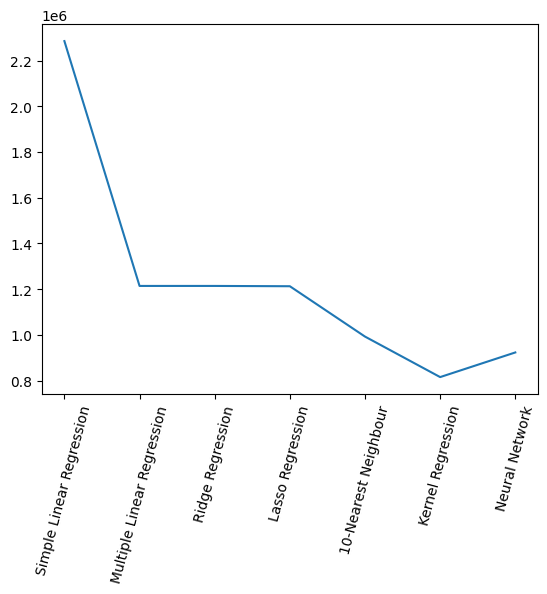

In [326]:
plt.plot(final_summary['Model'],final_summary['Test MSE'])
plt.xticks(rotation=75);